# Simulation of a Brownian particle in an optical trap 

# Fig. 1.

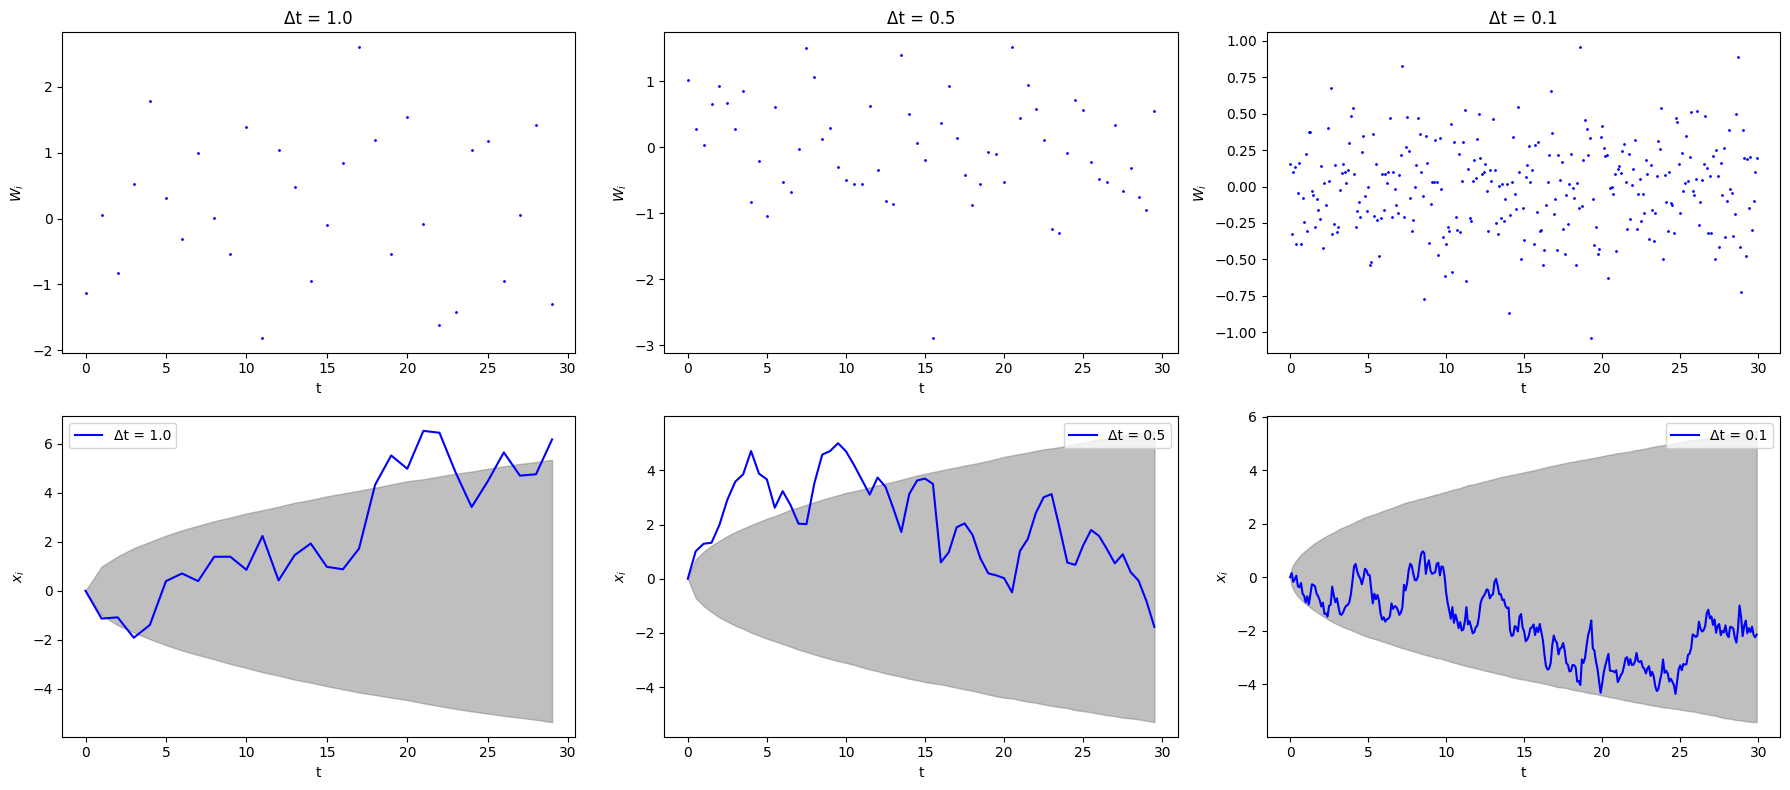

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
n_realizations = 10000
total_time = 30
dt_list = [1.0, 0.5, 0.1]

# Function to perform the simulation
def simulate_brownian_motion(dt, total_time, n_realizations):
    n_steps = int(total_time / dt)
    W_all = np.zeros((n_realizations, n_steps))
    x_all = np.zeros((n_realizations, n_steps))

    for j in range(n_realizations):
        W = np.random.normal(0, np.sqrt(dt), n_steps)
        x = np.zeros(n_steps)
        for i in range(1, n_steps):
            x[i] = x[i-1] + W[i-1]
        W_all[j, :] = W
        x_all[j, :] = x
    
    t = np.arange(n_steps) * dt
    mean_x = np.mean(x_all, axis=0)
    std_x = np.std(x_all, axis=0)
    
    return W_all, x_all, t, mean_x, std_x

fig, axs = plt.subplots(2, 3, figsize=(18, 8))

for idx, dt in enumerate(dt_list):
    W_all, x_all, t, mean_x, std_x = simulate_brownian_motion(dt, total_time, n_realizations)
    
    # Plot white noise (only the first realization for illustration)
    axs[0, idx].plot(t, W_all[0, :], 'b.', markersize=2)
    axs[0, idx].set_xlabel('t')
    axs[0, idx].set_ylabel('$W_i$')
    axs[0, idx].set_title(f'Δt = {dt}')
    
    # Plot Brownian motion with shaded area for standard deviation
    axs[1, idx].plot(t, x_all[0, :], 'b', label=f'Δt = {dt}')
    axs[1, idx].fill_between(t, mean_x - std_x, mean_x + std_x, color='gray', alpha=0.5)
    axs[1, idx].set_xlabel('t')
    axs[1, idx].set_ylabel('$x_i$')
    axs[1, idx].legend()

plt.tight_layout()
plt.show()

# Fig. 2.

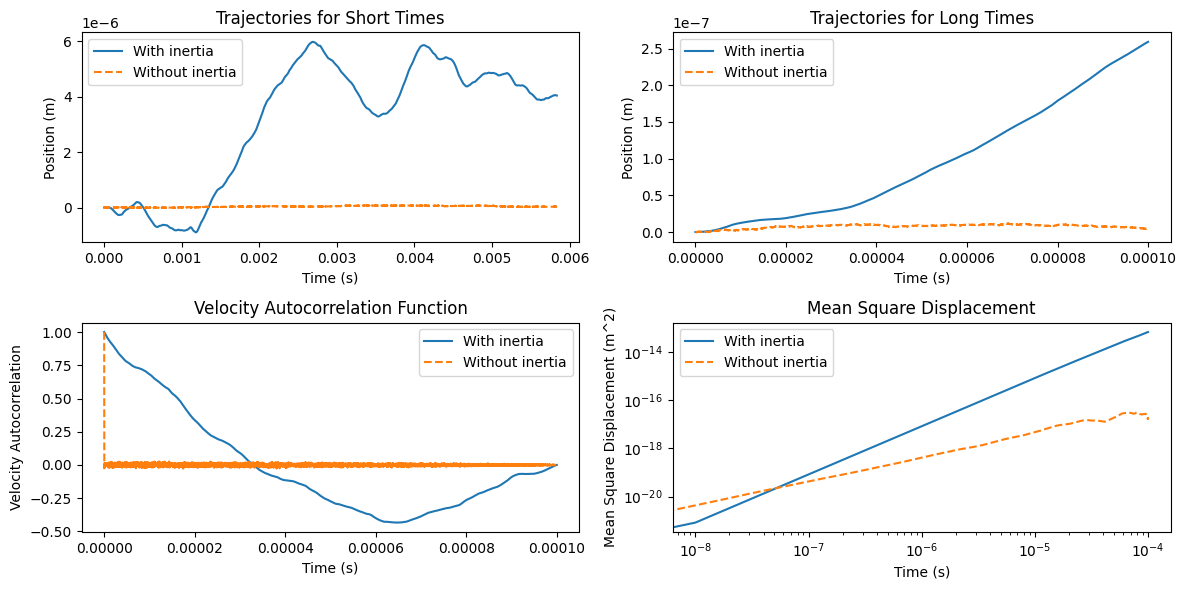

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
kB = 1.38e-23  # Boltzmann constant in J/K
T = 300  # Temperature in K
R = 1e-6  # Radius in meters
m = 11e-12  # Mass in kg
eta = 0.001  # Viscosity in Ns/m^2
gamma = 6 * np.pi * eta * R  # Friction coefficient
D = kB * T / gamma  # Diffusion coefficient
tau = m / gamma  # Relaxation time
dt = 10e-9  # Time step in seconds
n_steps = 10000  # Number of time steps
n_realizations = 1000  # Number of realizations

# Function to simulate Brownian motion with inertia
def brownian_with_inertia(n_steps, dt, m, gamma, D):
    x = np.zeros(n_steps)
    v = np.zeros(n_steps)
    w = np.random.normal(0, 1, n_steps)
    for i in range(1, n_steps):
        v[i] = v[i-1] - (gamma/m) * v[i-1] * dt + np.sqrt(2 * kB * T * gamma / (m * dt)) * w[i-1]
        x[i] = x[i-1] + v[i] * dt
    return x

# Function to simulate Brownian motion without inertia
def brownian_without_inertia(n_steps, dt, D):
    x = np.zeros(n_steps)
    w = np.random.normal(0, 1, n_steps)
    for i in range(1, n_steps):
        x[i] = x[i-1] + np.sqrt(2 * D * dt) * w[i-1]
    return x

# Trajectories for short times
short_n_steps = int(tau / dt * 10)
x_inertia_short = brownian_with_inertia(short_n_steps, dt, m, gamma, D)
x_no_inertia_short = brownian_without_inertia(short_n_steps, dt, D)

# Trajectories for long times
x_inertia_long = brownian_with_inertia(n_steps, dt, m, gamma, D)
x_no_inertia_long = brownian_without_inertia(n_steps, dt, D)

# Plot trajectories for short times
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
t_short = np.arange(short_n_steps) * dt
plt.plot(t_short, x_inertia_short, label='With inertia', linestyle='-')
plt.plot(t_short, x_no_inertia_short, label='Without inertia', linestyle='--')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.title('Trajectories for Short Times')
plt.legend()

# Plot trajectories for long times
plt.subplot(2, 2, 2)
t_long = np.arange(n_steps) * dt
plt.plot(t_long, x_inertia_long, label='With inertia', linestyle='-')
plt.plot(t_long, x_no_inertia_long, label='Without inertia', linestyle='--')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.title('Trajectories for Long Times')
plt.legend()

# Velocity autocorrelation function
def velocity_autocorrelation(x, dt):
    v = (x[1:] - x[:-1]) / dt
    v_mean = np.mean(v)
    autocorr = np.correlate(v - v_mean, v - v_mean, mode='full')
    return autocorr[autocorr.size // 2:] / autocorr[autocorr.size // 2]

# Compute velocity autocorrelation
vac_inertia = velocity_autocorrelation(x_inertia_long, dt)
vac_no_inertia = velocity_autocorrelation(x_no_inertia_long, dt)

# Plot velocity autocorrelation
plt.subplot(2, 2, 3)
t_vac = np.arange(vac_inertia.size) * dt
plt.plot(t_vac, vac_inertia, label='With inertia', linestyle='-')
plt.plot(t_vac, vac_no_inertia, label='Without inertia', linestyle='--')
plt.xlabel('Time (s)')
plt.ylabel('Velocity Autocorrelation')
plt.title('Velocity Autocorrelation Function')
plt.legend()

# Mean square displacement
def mean_square_displacement(x):
    n = len(x)
    msd = np.zeros(n)
    for i in range(n):
        msd[i] = np.mean((x[i:] - x[:n-i])**2)
    return msd

# Compute mean square displacement
msd_inertia = mean_square_displacement(x_inertia_long)
msd_no_inertia = mean_square_displacement(x_no_inertia_long)

# Plot mean square displacement
plt.subplot(2, 2, 4)
plt.loglog(t_long, msd_inertia, label='With inertia', linestyle='-')
plt.loglog(t_long, msd_no_inertia, label='Without inertia', linestyle='--')
plt.xlabel('Time (s)')
plt.ylabel('Mean Square Displacement (m^2)')
plt.title('Mean Square Displacement')
plt.legend()

plt.tight_layout()
plt.show()

# Fig. 3.

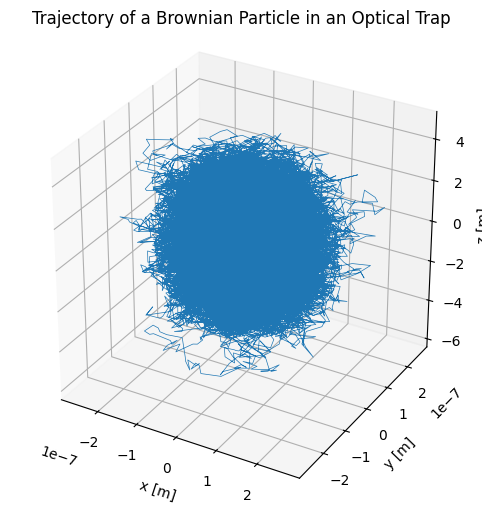

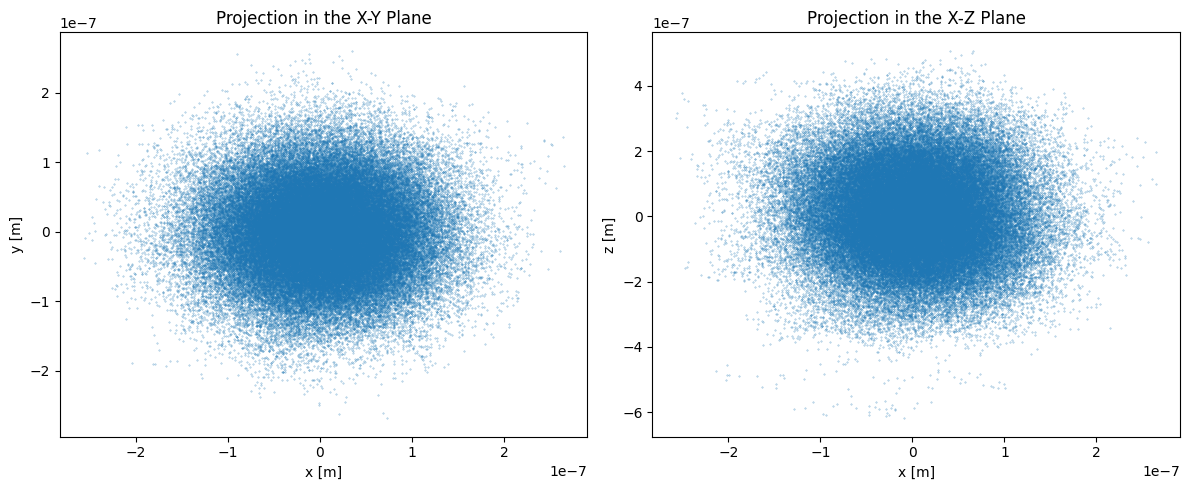

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # 3D plotting

# he trapped function
def trapped(N, Dt, x1, y1, z1, R, T, eta, kx, ky, kz):
    kB = 1.38e-23  # Boltzmann constant [J/K]
    gamma = 6 * np.pi * R * eta  # friction coefficient
    D = kB * T / gamma  # diffusion coefficient

    # Initialize arrays for positions
    x = np.zeros(N)
    y = np.zeros(N)
    z = np.zeros(N)
    t = np.linspace(0, N*Dt, N)

    # Initial conditions
    x[0], y[0], z[0] = x1, y1, z1

    for i in range(1, N):
        # Deterministic step
        x[i] = x[i-1] - kx * Dt / gamma * x[i-1]
        y[i] = y[i-1] - ky * Dt / gamma * y[i-1]
        z[i] = z[i-1] - kz * Dt / gamma * z[i-1]

        # Diffusive step
        x[i] += np.sqrt(2 * D * Dt) * np.random.randn()
        y[i] += np.sqrt(2 * D * Dt) * np.random.randn()
        z[i] += np.sqrt(2 * D * Dt) * np.random.randn()

    return x, y, z, t

# Parameters for simulation
N = 100000  # Number of samples
Dt = 1e-3   # Timestep [s]
x1, y1, z1 = 0, 0, 0  # Initial positions [m]
R = 1e-6    # Particle radius [m]
T = 300     # Temperature [K]
eta = 0.001 # Fluid viscosity [Pa s - water]
kx = 1e-6   # Trap stiffness in x [N/m]
ky = 1e-6   # Trap stiffness in y [N/m]
kz = 0.2e-6 # Trap stiffness in z [N/m]

# Simulate trapped particle trajectory
try:
    x, y, z, t = trapped(N, Dt, x1, y1, z1, R, T, eta, kx, ky, kz)

    # Plotting trajectory in 3D
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(x, y, z, linewidth=0.5)
    ax.set_xlabel('x [m]')
    ax.set_ylabel('y [m]')
    ax.set_zlabel('z [m]')
    ax.set_title('Trajectory of a Brownian Particle in an Optical Trap')
    ax.set_box_aspect([1,1,1])
    plt.show()

    # Plotting projections in the X-Y and X-Z planes as scatter plots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    # Projection in the X-Y plane
    ax1.scatter(x, y, s=0.1, alpha=0.6)
    ax1.set_xlabel('x [m]')
    ax1.set_ylabel('y [m]')
    ax1.set_title('Projection in the X-Y Plane')

    # Projection in the X-Z plane
    ax2.scatter(x, z, s=0.1, alpha=0.6)
    ax2.set_xlabel('x [m]')
    ax2.set_ylabel('z [m]')
    ax2.set_title('Projection in the X-Z Plane')

    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"Error in simulation: {e}")

# Fig. 4.

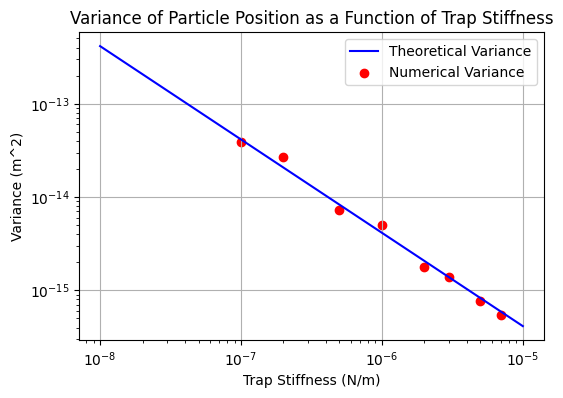

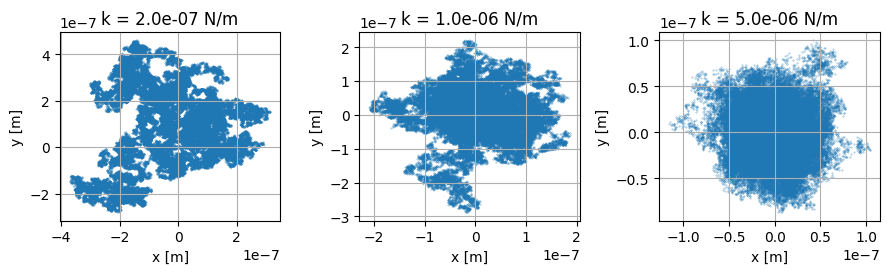

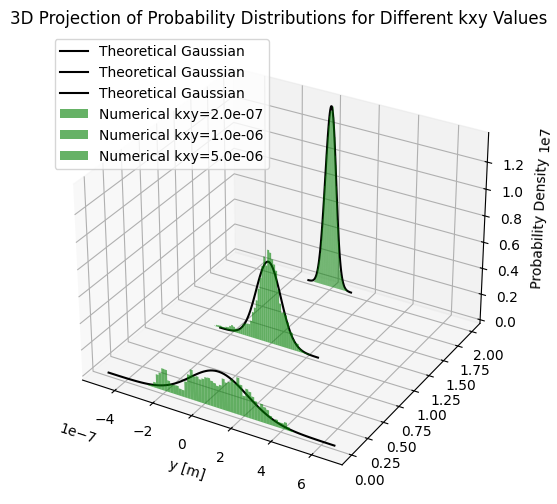

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Simulation parameters
N = 100000  # Number of time steps
Dt = 1e-5  # Time step in seconds
T = 300  # Temperature in Kelvin
eta = 0.001  # Fluid viscosity in Pa*s
R = 1e-6  # Particle radius in meters
kB = 1.38e-23  # Boltzmann constant [J/K]

# Additional optical trap stiffness values in N/m for more data points
additional_k_values = np.array([0.1e-6, 0.5e-6, 2.0e-6, 3.0e-6, 7.0e-6])  # Converted to N/m

# Combined stiffness values including the original ones
k_values = np.concatenate((np.array([0.2e-6, 1.0e-6, 5.0e-6]), additional_k_values))

# Function to simulate optical trap trajectories
def simulate_optical_trap(N, Dt, kx, ky, gamma, D):
    x = np.zeros(N)
    y = np.zeros(N)
    z = np.zeros(N)
    
    for i in range(1, N):
        x[i] = x[i-1] - (kx / gamma) * x[i-1] * Dt + np.sqrt(2 * D * Dt) * np.random.randn()
        y[i] = y[i-1] - (ky / gamma) * y[i-1] * Dt + np.sqrt(2 * D * Dt) * np.random.randn()
        z[i] = z[i-1] + np.sqrt(2 * D * Dt) * np.random.randn()
    
    return x, y, z

# Function to compute theoretical variance in 3D
def theoretical_variance_3d(kx, ky, T):
    return np.array([kB * T / kx, kB * T / ky, 2 * kB * T / ky])

# Function to compute theoretical variance for a range of k values
def theoretical_variance(k_values, T):
    return kB * T / k_values

# Function to calculate variance
def calculate_variance(data):
    return np.var(data)

# Function to plot variance and probability distribution
def plot_variance_and_distribution(ax, y, kxy, offset):
    variance = calculate_variance(y)
    hist, bins = np.histogram(y, bins=50, density=True)
    bins_center = (bins[:-1] + bins[1:]) / 2
    
    # Plotting the histogram as a 3D projection
    ax.bar(bins_center, hist, zs=offset, zdir='y', alpha=0.6, width=(bins[1] - bins[0]), color='g', label=f'Numerical kxy={kxy:.1e}')
    
    # Theoretical Gaussian distribution for comparison
    std_dev_y = np.sqrt(kB * T / (kxy))  # Standard deviation from equipartition theorem
    mean_y = np.mean(y)
    theoretical_y = np.linspace(mean_y - 4*std_dev_y, mean_y + 4*std_dev_y, 100)
    theoretical_pdf = 1/(np.sqrt(2*np.pi)*std_dev_y) * np.exp(-(theoretical_y - mean_y)**2 / (2*std_dev_y**2))
    ax.plot(theoretical_y, theoretical_pdf, zs=offset, zdir='y', color='k', label='Theoretical Gaussian')
    
    ax.set_xlabel('y [m]')
    ax.set_zlabel('Probability Density')

# Friction coefficient and diffusion coefficient
gamma = 6 * np.pi * R * eta
D = kB * T / gamma

# Simulate trajectories for different stiffness values
trajectories = [simulate_optical_trap(N, Dt, k, k, gamma, D) for k in k_values]

# Compute numerical variances
numerical_variances = [np.var(y) for x, y, z in trajectories]

# Compute theoretical variances for a range of k values
k_range = np.logspace(np.log10(0.1e-7), np.log10(10e-6), 100)
theoretical_variances = theoretical_variance(k_range, T)

# Plotting the variances
plt.figure(figsize=(6, 4))
plt.plot(k_range, theoretical_variances, label='Theoretical Variance', linestyle='-', color='blue')
plt.scatter(k_values, numerical_variances, label='Numerical Variance', color='red')
plt.xlabel('Trap Stiffness (N/m)')
plt.ylabel('Variance (m^2)')
plt.title('Variance of Particle Position as a Function of Trap Stiffness')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.savefig('./data/variance_vs_stiffness.png')
plt.show()

# Plotting the projections in the X-Y plane for different stiffness values
fig, axs = plt.subplots(1, 3, figsize=(9, 3))
titles = [f'k = {k:.1e} N/m' for k in [0.2e-6, 1.0e-6, 5.0e-6]]

for i, (ax, (x, y, z), title) in enumerate(zip(axs, trajectories[:3], titles)):
    ax.scatter(x, y, s=0.1, alpha=0.6)
    ax.set_title(title)
    ax.set_xlabel('x [m]')
    ax.set_ylabel('y [m]')
    ax.grid(True)

plt.tight_layout()
plt.savefig('./data/projections_xy.png')
plt.show()

# Create a 3D plot for histograms of X-Y projections
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot each histogram as a projection in the 3D plot
for i, kxy in enumerate(k_values[:3]):
    x, y, z = trajectories[i]
    plot_variance_and_distribution(ax, y, kxy, offset=i)

ax.set_title('3D Projection of Probability Distributions for Different kxy Values')
ax.legend()
plt.savefig('./data/3d_projection_histograms.png')
plt.show()

# Fig. 5.

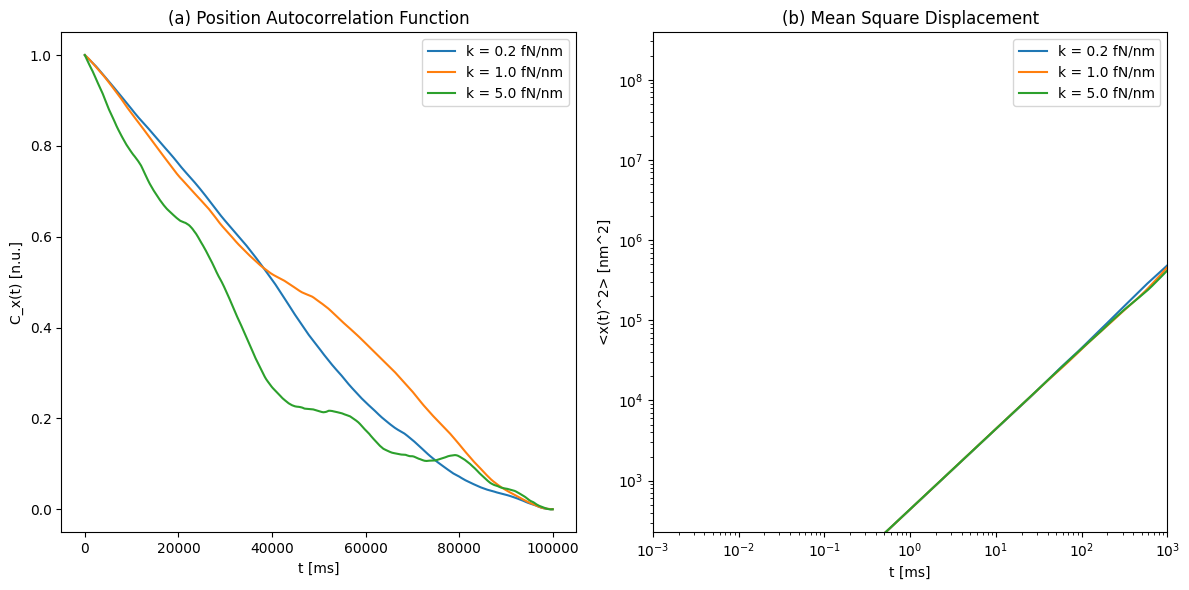

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
kB = 1.38e-23  # Boltzmann constant [J/K]
T = 300  # Temperature [K]
eta = 0.001  # Fluid viscosity [Pa s]
R = 1e-6  # Particle radius [m]
gamma = 6 * np.pi * R * eta  # Friction coefficient
D = kB * T / gamma  # Diffusion coefficient
N = int(1e5)  # Number of samples
Dt = 1e-3  # Timestep [s]

# Trap stiffness values
k_values = [0.2e-12, 1e-12, 5e-12]  # [N/m]

def simulate_trapped_particle(k):
    x = np.zeros(N)
    for i in range(1, N):
        x[i] = x[i-1] - k * Dt / gamma * x[i-1] + np.sqrt(2 * D * Dt) * np.random.randn()
    return x

def autocorrelation(x):
    result = np.correlate(x, x, mode='full') / np.correlate(x, x, mode='full').max()
    result = result[N-1:]  # Take only the non-negative part
    return result

def mean_square_displacement(x):
    msd = np.zeros(len(x))
    for n in range(1, len(x)):
        msd[n] = np.mean((x[n:] - x[:-n]) ** 2)
    return msd

# Simulations
autocorr_results = []
msd_results = []
for k in k_values:
    x = simulate_trapped_particle(k)
    autocorr_results.append(autocorrelation(x))
    msd_results.append(mean_square_displacement(x))

# Time arrays
t_autocorr = Dt * np.arange(N)
t_msd = Dt * np.arange(len(msd_results[0]))

# Plotting
plt.figure(figsize=(12, 6))

# Subplot (a) - Position Autocorrelation Function
plt.subplot(1, 2, 1)
for i, k in enumerate(k_values):
    plt.plot(t_autocorr * 1e3, autocorr_results[i], label=f'k = {k*1e12:.1f} fN/nm')
plt.xlabel('t [ms]')
plt.ylabel('C_x(t) [n.u.]')
plt.legend()
plt.title('(a) Position Autocorrelation Function')

# Subplot (b) - Mean Square Displacement
plt.subplot(1, 2, 2)
for i, k in enumerate(k_values):
    plt.plot(t_msd * 1e3, msd_results[i] * 1e18, label=f'k = {k*1e12:.1f} fN/nm')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('t [ms]')
plt.ylabel('<x(t)^2> [nm^2]')
plt.legend()
plt.title('(b) Mean Square Displacement')

plt.xlim(left=1e-3, right=1e3)

plt.tight_layout()
plt.show()

# Fig. 6.

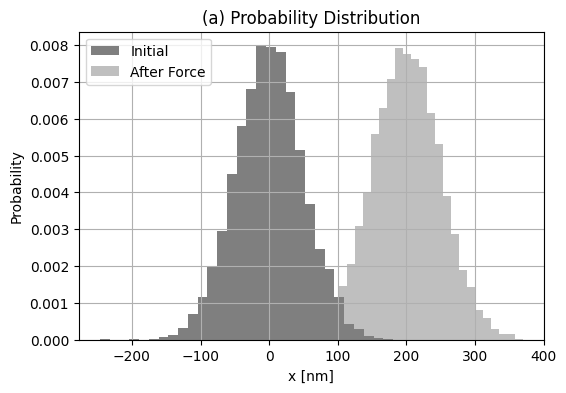

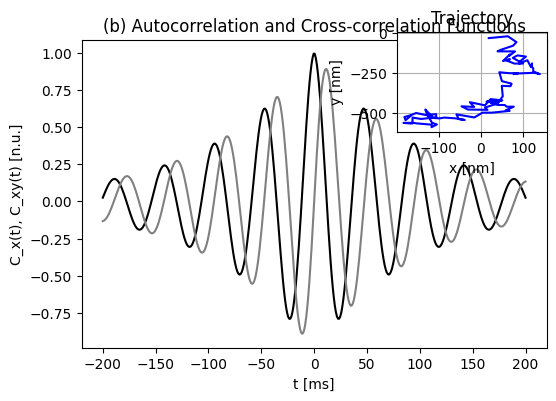

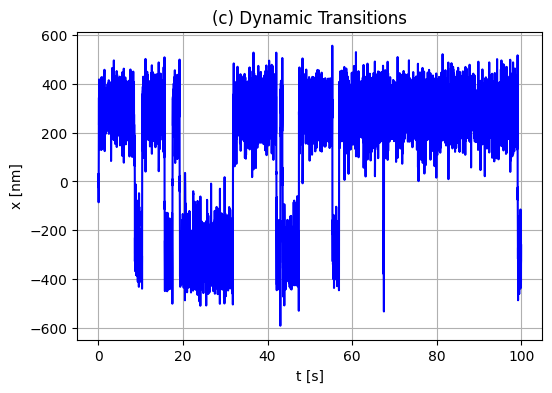

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def plot_probability_distribution():
    # Parameters
    N = 10000
    mean_initial = 0  # Mean of the initial distribution (nm)
    mean_final = 200  # Mean of the final distribution after force application (nm)
    std_dev = 50  # Standard deviation of the distributions (nm)
    
    # Generate initial and final distributions
    x_initial = np.random.normal(loc=mean_initial, scale=std_dev, size=N)
    x_final = np.random.normal(loc=mean_final, scale=std_dev, size=N)
    
    # Plotting histograms
    plt.figure(figsize=(6, 4))
    plt.hist(x_initial, bins=30, density=True, alpha=0.5, color='black', label='Initial')
    plt.hist(x_final, bins=30, density=True, alpha=0.5, color='gray', label='After Force')
    plt.xlabel('x [nm]')
    plt.ylabel('Probability')
    plt.legend()
    plt.title('(a) Probability Distribution')
    plt.grid(True)
    plt.show()

plot_probability_distribution()

#############################################################
import numpy as np
import matplotlib.pyplot as plt

def plot_autocorrelation_crosscorrelation():
    # Parameters
    t = np.linspace(-200, 200, 400)  # Time in ms
    tau = 0.1  # Characteristic time in seconds
    omega = 132.6  # Rotational frequency in rad/s
    
    # Convert time to seconds for calculations
    t_sec = t * 1e-3
    
    # Autocorrelation and cross-correlation functions
    C_xx = np.exp(-np.abs(t_sec) / tau) * np.cos(omega * t_sec)
    C_xy = np.exp(-np.abs(t_sec) / tau) * np.sin(omega * t_sec)
    
    plt.figure(figsize=(6, 4))
    plt.plot(t, C_xx, color='black', label='C_x(t)')
    plt.plot(t, C_xy, color='gray', label='C_xy(t)')
    plt.xlabel('t [ms]')
    plt.ylabel('C_x(t), C_xy(t) [n.u.]')
    plt.legend()
    plt.title('(b) Autocorrelation and Cross-correlation Functions')
    
    # Inset trajectory plot
    inset_ax = plt.axes([0.65, 0.65, 0.25, 0.25])
    trajectory_x = np.cumsum(np.random.randn(100)) * 20
    trajectory_y = np.cumsum(np.random.randn(100)) * 20
    inset_ax.plot(trajectory_x, trajectory_y, color='blue')
    inset_ax.set_xlabel('x [nm]')
    inset_ax.set_ylabel('y [nm]')
    inset_ax.set_title('Trajectory')
    inset_ax.grid(True)
    plt.show()

plot_autocorrelation_crosscorrelation()

######################################################
import numpy as np
import matplotlib.pyplot as plt

def plot_dynamic_transitions():
    # Parameters
    N = 10000  # Number of time steps
    Dt = 0.01  # Time step in seconds
    a = 1.0e7  # N/m^3
    b = 1.0e-6  # N/m
    kB = 1.38e-23  # Boltzmann constant [J/K]
    T = 300  # Temperature [K]
    eta = 0.001  # Fluid viscosity [Pa s]
    R = 1e-6  # Particle radius [m]
    gamma = 6 * np.pi * R * eta  # Friction coefficient
    D = kB * T / gamma  # Diffusion coefficient

    # Simulate dynamic transitions in a double-well potential
    t = np.linspace(0, N * Dt, N)
    x = np.zeros(N)
    for i in range(1, N):
        force = -a * x[i-1]**3 + b * x[i-1]
        x[i] = x[i-1] + force * Dt / gamma + np.sqrt(2 * D * Dt) * np.random.randn()
    
    plt.figure(figsize=(6, 4))
    plt.plot(t, x * 1e9, color='blue')
    plt.xlabel('t [s]')
    plt.ylabel('x [nm]')
    plt.title('(c) Dynamic Transitions')
    plt.grid(True)
    plt.show()

plot_dynamic_transitions()